In [5]:
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import mplfinance as mpf
import yfinance as yf

# TODO
* fit curve to macdhist to determine trade time
* cure params are fitted based on historical data of the stock and best/leeast risky performacne

after that:
* run for many tickers
* measure performance
* experiment with different timeframes

In [7]:
start = dt.datetime(2022, 1, 10)
end = dt.datetime.now()
interval = '1h'
code = 'SPY'
data = makeAnalysis(code, start, end, interval=interval, return_data=True)
trades = TradingStrategies.sillyStrategyOriginal(data)
makeAnalysis(code, start, end, interval, False, trades)
print(f"profit: ${calculateProfit(trades)}")

TypeError: makeAnalysis() got an unexpected keyword argument 'return_data'

536.9079895019531

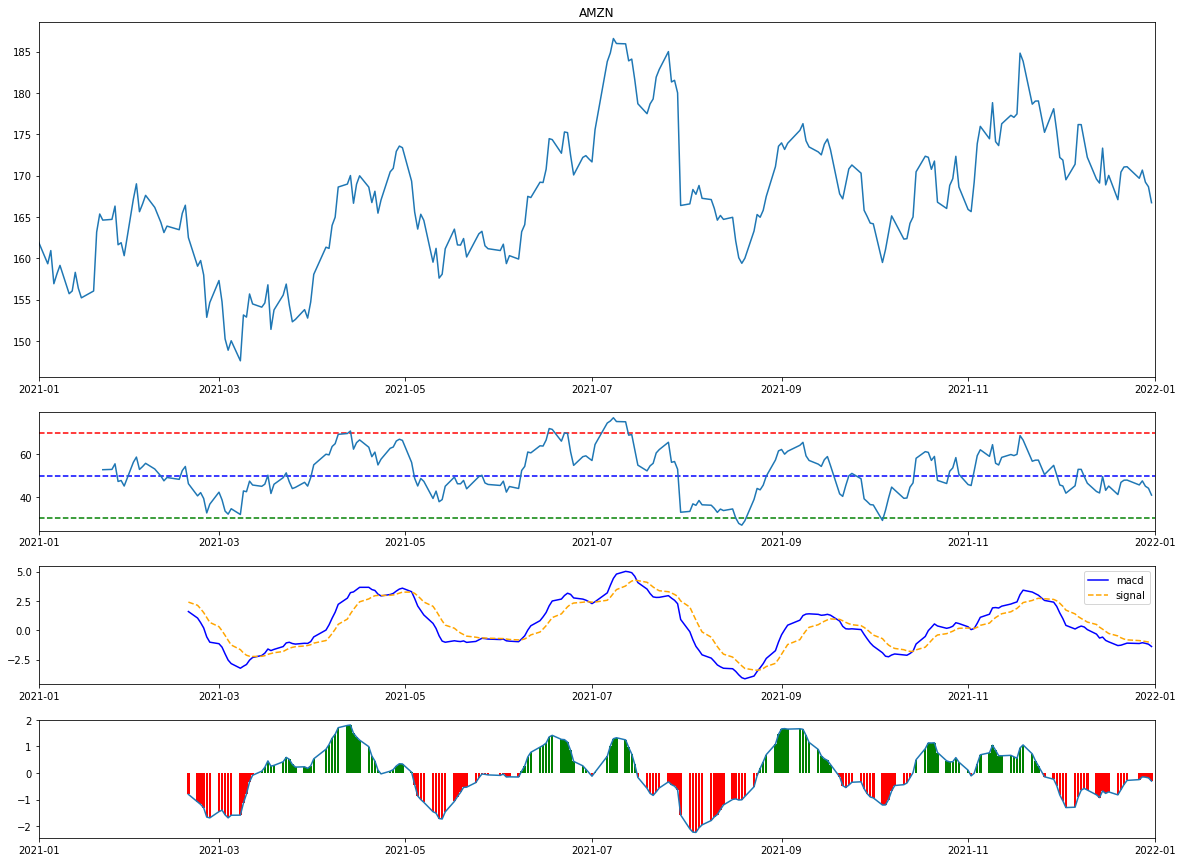

In [ ]:
start = dt.datetime(2021, 1,1)
end = dt.datetime(2022,1,1)
data = makeAnalysis('AMZN', start, end, interval='1d',  return_data=True)
calculateProfit(TradingStrategies.sillyStrategyOriginal(data))
# calculateProfit(TradingStrategies.bestPossible(data))

In [ ]:
portfolio.positions

{'SPY': 1}

In [ ]:
for t in trades:
    print(t.kind, t.price)

buy 443.30999755859375
buy 375.07000732421875
sell 754.5


In [25]:
data

,Open,High,Low,Close,Adj Close,Volume,RSI,macd,macd_signal,macd_hist,SMA200,SMA100
Date,,,,,,,,,,,,
2021-08-02,440.339996,440.929993,437.209991,437.589996,429.690491,58783300,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-03,438.440002,441.279999,436.100006,441.149994,433.186188,58053900,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-04,439.779999,441.119995,438.730011,438.980011,431.055420,46732200,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-05,440.220001,441.850006,439.880005,441.760010,433.785217,38969700,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-06,442.100006,442.940002,441.799988,442.489990,434.502014,46930000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-02,402.250000,407.859985,402.140015,406.910004,406.910004,85273900,62.875944,6.562050,5.794511,0.767539,403.743951,391.786401
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,55.317128,6.042807,5.844170,0.198636,403.556601,392.003201
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,50.202746,5.107641,5.696864,-0.589224,403.354601,392.090201


profit: $-39.180023193359375 portfolio: {'SPY': 1}


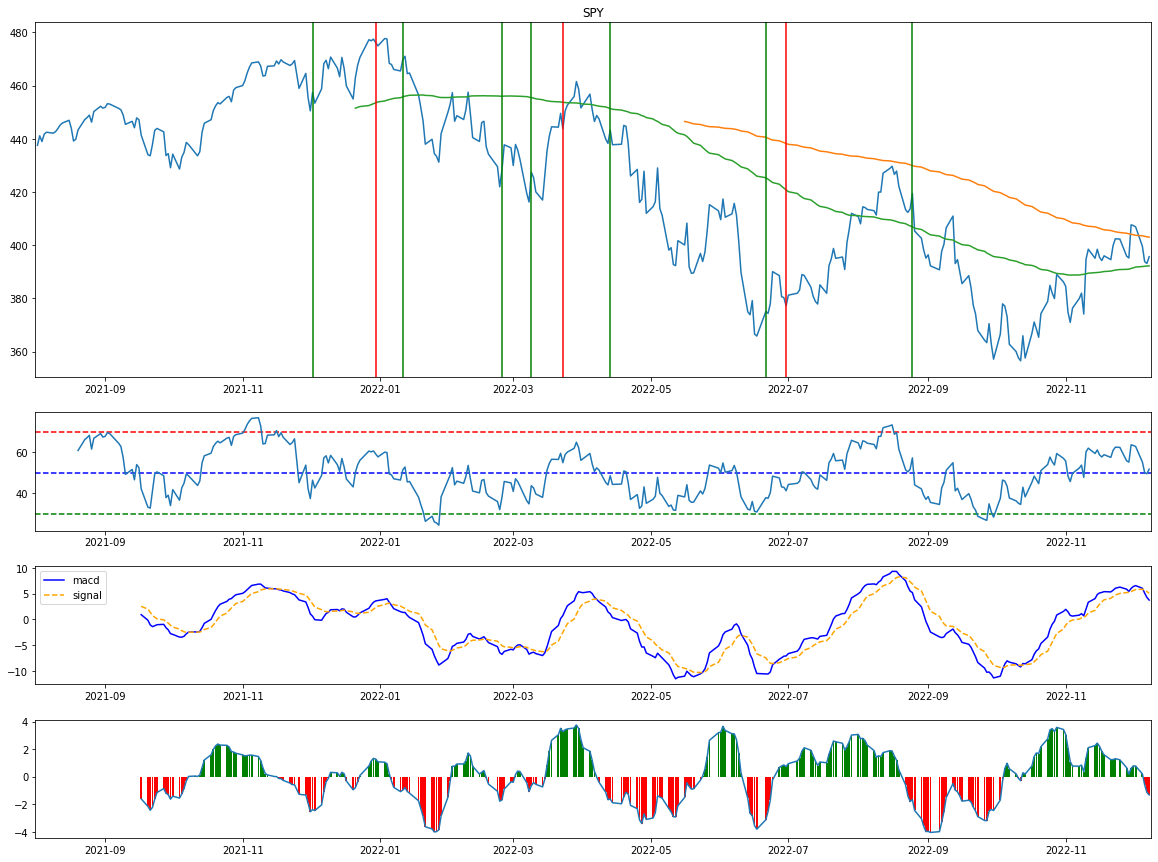

In [31]:
start = dt.datetime(2021, 8, 1)
end = dt.datetime.now()
interval = '1h'
ticker_code = 'SPY'

data = makeAnalysis(ticker_code, start, end, interval='1d')
trades, portfolio = TradingStrategies.sillyStrategyOriginal(data, ticker_code)
plotAnalysis(data, ticker_code, trades)
print(f"profit: ${calculateProfit(trades)} portfolio: {portfolio.positions}")

In [30]:
class Trade:
    def __init__(self, date, kind, price) -> None:
        self.date = date
        self.kind = kind
        self.price = price

class Portfolio:
    def __init__(self, code) -> None:
        self.positions = dict()
        self.positions[code] = 0

    def buy(self, code):
        self.positions[code] +=1

    def sell(self, code):
        if self.positions[code] > 0:
            sold = self.positions[code]
            self.positions[code] = 0
            return sold, code
        else:
            print("No position open")
            return 0, 0

def calculateProfit(TradesList):
    if trades == []:
        return 0
    result = 0
    if TradesList[0].kind == "sell":
        TradesList.pop(0)
    if TradesList[-1].kind == "buy":
        TradesList.pop(len(TradesList)-1)
    for t in TradesList:
        if t.kind == "buy":
            result -= t.price
        elif t.kind == "sell":
            result += t.price
        else:
            raise Exception("Wrong Trade kind")
    return result



def makeAnalysis(ticker_code, start, end, interval='1d'):
    data = yf.download(ticker_code, start=start, end=end, interval=interval, progress=False)
    data['RSI'] = ta.RSI(data['Close'])
    data['macd'], data['macd_signal'], data['macd_hist'] = ta.MACD(data['Close'])
    data['SMA200'], data['SMA100'] = ta.SMA(data['Close'], 200), ta.SMA(data['Close'], 100)
    return data

def plotAnalysis(data, ticker_code, trades = []):
    fig, ax = plt.subplots(4, 1, gridspec_kw={"height_ratios": [3, 1, 1, 1]}, figsize=(20,15))

    ax[0].plot(data['Close'])
    ax[0].plot(data['SMA200'])
    ax[0].plot(data['SMA100'])
    ax[0].set_title(ticker_code)
    if trades != []:
        for t in trades:
            ax[0].axvline(t.date, c="r" if t.kind == "sell" else "g")
            
    ax[1].axhline(y=70, color='r', linestyle='--')
    ax[1].axhline(y=50, color='b', linestyle='--')
    ax[1].axhline(y=30, color='g', linestyle='--')
    ax[1].plot(data['RSI'])

    c = ['red' if cl < 0 else 'green' for cl in data['macd_hist']]
    ax[2].plot(data['macd'], 'b-')
    ax[2].plot(data['macd_signal'], '--', color='orange')
    ax[2].legend(['macd', 'signal'])

    ax[3].bar(data['macd_hist'].index, data['macd_hist'], color=c)
    ax[3].plot(data['macd_hist'])
    plt.setp(ax, xlim=[start, end])

class TradingStrategies:
    def bestPossible(data):
        # best possible
        arr = data['macd_hist']
        binary = arr > 0
        ind = np.where(np.diff(binary))[0]

        trades = []

        for i in range(len(ind)-1):
            if binary[int((ind[i]+ind[i+1])/2)] == 0:
                curr_time_frame = [ind[i], ind[i+1]]
                best_trade_index = np.argmin(data['macd_hist'][curr_time_frame[0]:curr_time_frame[1]])
                best_trade_time = data.index[curr_time_frame[0]:curr_time_frame[1]][best_trade_index]
                trades.append(Trade(best_trade_time, "buy", data['Close'][best_trade_time]))
            else:
                curr_time_frame = [ind[i], ind[i+1]]
                best_trade_index = np.argmax(data['macd_hist'][curr_time_frame[0]:curr_time_frame[1]])
                best_trade_time = data.index[curr_time_frame[0]:curr_time_frame[1]][best_trade_index]
                trades.append(Trade(best_trade_time, "sell", data['Close'][best_trade_time]))
        return trades
        
    def sillyStrategyOriginal(data, ticker_code):
        portfolio = Portfolio(ticker_code)
        # stupid one, no lookahead
        arr = data['macd_hist']
        binary = arr > 0
        ind = np.where(np.diff(binary))[0]

        trades = []

        for i in range(len(ind)-1):
            if ind[i+1] - ind[i] > 5:
                if (binary[int((ind[i]+ind[i+1])/2)]) == 0:
                    curr_time_frame = [ind[i], ind[i+1]]
                    analyzed_part = data['macd_hist'][curr_time_frame[0]:curr_time_frame[1]]
                    analyzed_diff = np.diff(analyzed_part)
                    if len(analyzed_part[1:][[analyzed_diff > 0][0]]) >  1:
                        best_trade_time = analyzed_part[1:][[analyzed_diff > 0][0]].index[0]
                    else:
                        best_trade_time = analyzed_part[1:][[analyzed_diff > 0][0]].index[0]
                    trades.append(Trade(best_trade_time, "buy", data['Close'][best_trade_time]))
                    portfolio.buy(ticker_code)
                elif (portfolio.positions[ticker_code] > 0):
                    curr_time_frame = [ind[i], ind[i+1]]
                    analyzed_part = data['macd_hist'][curr_time_frame[0]:curr_time_frame[1]]
                    analyzed_diff = np.diff(analyzed_part)
                    if len(analyzed_part[1:][[analyzed_diff < 0][0]]) >  1:
                        best_trade_time = analyzed_part[1:][[analyzed_diff < 0][0]].index[0]
                    else:
                        best_trade_time = analyzed_part[1:][[analyzed_diff < 0][0]].index[0]
                    if trades[-1].price < data['Close'][best_trade_time]:
                        sold, code = portfolio.sell(ticker_code)
                        trades.append(Trade(best_trade_time, "sell", data['Close'][best_trade_time]*sold))
        return trades, portfolio

# old

In [ ]:
    def sillyStrategy(data):
        # stupid one, no lookahead
        arr = data['macd_hist']
        binary = arr > 0
        ind = np.where(np.diff(binary))[0]

        trades = []

        for i in range(len(ind)-1):
            if ind[i+1] - ind[i] > 5:
                if binary[int((ind[i]+ind[i+1])/2)] == 0:
                    curr_time_frame = [ind[i], ind[i+1]]
                    analyzed_part = data['macd_hist'][curr_time_frame[0]:curr_time_frame[1]]
                    analyzed_diff = np.diff(analyzed_part)
                    if len(analyzed_part[1:][[analyzed_diff > 0][0]]) >  1:
                        best_trade_time = analyzed_part[1:][[analyzed_diff > 0][0]].index[0]
                    else:
                        best_trade_time = analyzed_part[1:][[analyzed_diff > 0][0]].index[0]
                    trades.append(Trade("buy", data['Close'][best_trade_time]))
                else:
                    curr_time_frame = [ind[i], ind[i+1]]
                    analyzed_part = data['macd_hist'][curr_time_frame[0]:curr_time_frame[1]]
                    analyzed_diff = np.diff(analyzed_part)
                    if len(analyzed_part[1:][[analyzed_diff < 0][0]]) >  1:
                        best_trade_time = analyzed_part[1:][[analyzed_diff < 0][0]].index[0]
                    else:
                        best_trade_time = analyzed_part[1:][[analyzed_diff < 0][0]].index[0]
                    trades.append(Trade("sell", data['Close'][best_trade_time]))
        return trades